### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games  wants to better understand how users accumulate loyalty points. Analysis conducted to investigate the possible relationships between the: 
- loyalty points, 
- age, 
- remuneration, and 
- spending scores. 

## 1. Load and explore the data

#### All libraries used in this notebook are listed in the cell below for ease, and referenced throughout the notebook

In [1]:
# Imports Analysis Section 1 and 2.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import matplotlib.animation as animation

# Analysis Section 2 Clustering.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

# Anlaysis Section 3 NLP.
import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('punkt')
import os 

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

# Import Fequency Distributer
from nltk.probability import FreqDist


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')


# View the DataFrame.
print(reviews.shape)
reviews.head()

(2000, 11)


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Check data types
reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [4]:
# Check for missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [5]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

##### Language is always english and details about the platform type are not required, so remove both columns.

In [7]:
# Drop unnecessary columns.
reviews = reviews.drop(columns=['language','platform'])

In [8]:
# View column names.
reviews.columns.tolist()

['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 3. Rename columns

In [9]:
# Rename the column headers.
reviews.rename(columns={'remuneration (k£)' : 'remuneration', 'spending_score (1-100)' : 'spending_score'}, inplace = True)

# View column names.
reviews.columns.tolist()

['gender',
 'age',
 'remuneration',
 'spending_score',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 4. Save the DataFrame as a CSV file

In [10]:
# Create a CSV file as output.
reviews.to_csv('reviews_cleaned.csv',index=False)

In [11]:
# Import new CSV file with Pandas.
reviews_c = pd.read_csv('reviews_cleaned.csv')

# View DataFrame.
print(reviews_c.shape)
reviews_c.head()

(2000, 9)


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) Spending vs loyalty

In [12]:
# Independent variable.
x = reviews_c['spending_score']

# Dependent variable.
y = reviews_c['loyalty_points']


# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews_c).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        17:33:45   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64


In [14]:
# Extract the standard errors.
print("Standard errors: ", test.bse) 

Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64


In [15]:
# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [16]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.052663) + 33.061693 * reviews_c['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

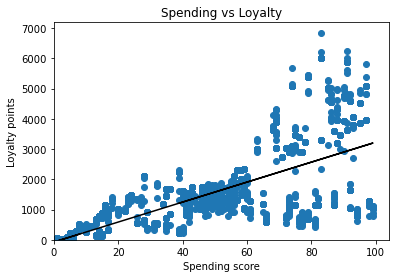

In [17]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Insert labels and title.
plt.title("Spending vs Loyalty")
plt.xlabel("Spending score")
plt.ylabel("Loyalty points")

# View the plot.
plt.show()

### Notes - Observations and insights
Expected to find  correlation between spending points and loyality points because as per metadata the loyality points are awarded '..based on the point value of the purchase, converting the monetary value to point purchases..' While spending score is '..based on the customer’s spending nature and behaviour.'

Weak postitive correlation between spend score and loyalty, but not good predictor especially after 60 spending points there is no correlation. Therefore do not extrapolate beyond 60. Lack of correlation after 60 may be caused by lack of data.

**Prob (F-statistic)** this is the same as the **p-value** of the X – the measure of the probability that the observed difference could have happened by chance. Lower the p-value, the greater the statistical signficance.

In this example, the p-value is 2.92e-263, and thus less than 0.05. Therefore, the p-value is significant. So reject null hypothesis and conclude there is a statistically significant relationship between the two scores.

**R-squared** measures the percentage of variation of a dependent variable that is explained by an independent variable. R-squared takes values from 0 to 1 (0% to 100%). Therefore, the closer the value is to 1 (or 100%), the better the model.
The R-squared values is 45%, so we can say 45% of the loyality point score is explained by the spending behaviour (spending score) of the customers.  The higher the spending score the more loyality points up to a spending score of 60.


### 5b) renumeration vs loyalty

In [18]:
# Independent variable.
x = reviews_c['remuneration']

# Dependent variable.
y = reviews_c['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews_c).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        17:33:45   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64


In [20]:
# Extract the standard errors.
print("Standard errors: ", test.bse) 

Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64


In [21]:
# Extract the predicted values.
print("Predicted values:", test.predict())

Predicted values: [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [22]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.686513) + 34.187825 * reviews_c['remuneration']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

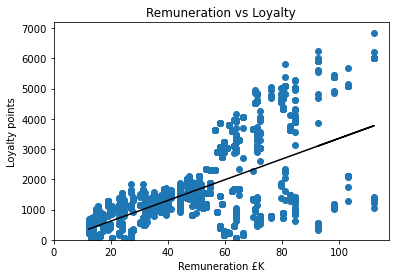

In [23]:
# Plot graph with regression line.
plt.scatter(x,y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Insert labels and title
plt.title("Remuneration vs Loyalty")
plt.xlabel("Remuneration £K")
plt.ylabel("Loyalty points")

# View the plot.
plt.show()

###  Notes - Observations and insights
Strong postitive correlation between income (remuneration) and loyalty points, but not good predictor especially after £55,000 there is no correlation. Therefore do not extrapolate beyond £55,000.

Prob (F-statistic) this is the same as the p-value of the X – the measure of the probability that the observed difference could have happened by chance. Lower the p-value, the greater the statistical signficance.

In this example, the p-value is 2.43e-209, and thus less than 0.05. Therefore, the p-value is significant. So reject null hypothesis and conclude there is a statistically significant relationship between the two scores.

R-squared measures the percentage of variation of a dependent variable that is explained by an independent variable. R-squared takes values from 0 to 1 (0% to 100%). Therefore, the closer the value is to 1 (or 100%), the better the model. The R-squared values is 38%, so we can say 38% of the loyality point score is explained by the income (remuneration) of the customers. The greater the income of the customer the more loyality points they have up to an income of about £55,000 after which income doesn't predict loyality point score well.

### 5c) Age vs loyalty

In [24]:
# Independent variable.
x = reviews_c['age']

# Dependent variable.
y = reviews_c['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews_c).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0577
Time:                        17:33:46   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Extract the estimated parameters.
print("Parameters:", test.params)

Parameters: Intercept    1736.517739
x              -4.012805
dtype: float64


In [26]:
# Extract the standard errors.
print("Standard errors:", test.bse)

Standard errors: Intercept    88.248731
x             2.113177
dtype: float64


In [27]:
# Extract the predicted values.
print("Predicted values:", test.predict())

Predicted values: [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [28]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (1736.517739) + -4.012805 * reviews_c['age']

# View the output.
y_pred


0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

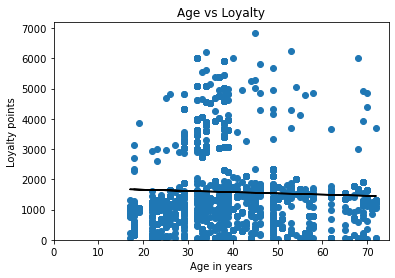

In [29]:
# Plot graph with regression line.
plt.scatter(x,y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Insert labels and title.
plt.title("Age vs Loyalty")
plt.xlabel("Age in years")
plt.ylabel("Loyalty points")

# View the plot.
plt.show()

No relationship between age and loyality, evidence from graph and from R-squared value.

###  Notes -  Observations and insights

No relationship between age and loyality points

Prob (F-statistic) this is the same as the p-value of the X – the measure of the probability that the observed difference could have happened by chance. Lower the p-value, the greater the statistical signficance.

In this example, the p-value is 3.606, and is  greater than 0.05. Therefore, the p-value is not significant. So we fail to reject the null hypothesis and conclude there is not statistically significant relationship between the two scores.

R-squared measures the percentage of variation of a dependent variable that is explained by an independent variable. R-squared takes values from 0 to 1 (0% to 100%). Therefore, the closer the value is to 1 (or 100%), the better the model. The R-squared values is 2%, so we can say 2% of the loyalty point score is explained by the age of the customers. Age is not a useful indicator to prefict loyalty points.

## 6. Observations and insights - summary

(see individual linear regression tests for details on comparisons between loyality and spending score, remuneration and age respectively)

Combined spending and income (remuneration) do a good job of explaining loyality points. The age of the customer doesn't seem to be a good predictor.

Take forward further analysis regarding spending and income (remuneration)

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores.
Identify groups within the customer base that can be used to target specific market segments. 

## 1. Load and explore the data

```python
# Libraries used in this section
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')
```

In [30]:
# Load the CSV file(s) as df2.
reviewes_c = pd.read_csv('reviews_cleaned.csv')


# View the DataFrame.
print(reviewes_c.shape)
reviewes_c.head()

(2000, 9)


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


###### Note
Isolate rumuneration and spending score columns by creating a new data frame to use for analysis

In [31]:
# Drop unnecessary columns.
df2 = reviews_c[['remuneration', 'spending_score']]

# View DataFrame.
df2.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [32]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [33]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

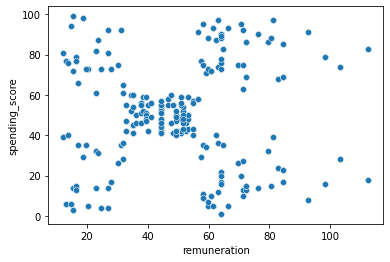

In [34]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2)

###### Note
Visual evidence of clustering, explore further to determins most appropriate number of clusters to define customer groups.

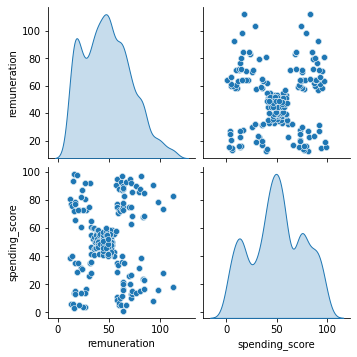

In [35]:
# Create a pairplot with Seaborn.
x = df2

sns.pairplot(df2,
             vars=x,
             diag_kind= 'kde')

## 3. Elbow and silhoutte methods

######  Note
Use Elbow and silhoutte methods to estimate best cluster size

#### Elbow

In [36]:
# Determine the number of clusters: Elbow method calculation.
ss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=500,
                    n_init=10,
                    random_state=42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

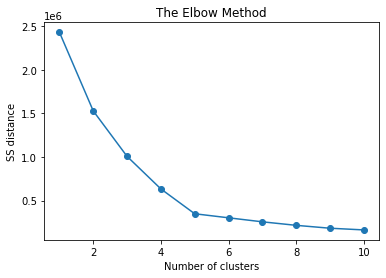

In [37]:
# Plot the elbow method.
fig, ax = plt.subplots()

ax.plot(range(1, 11),
         ss,
         marker='o')

ax.annotate("Elbow",
            xy=(4,0.75),
            verticalalignment='bottom',
            horizontalalignment='center',
            bbox={'boxstyle': 'circle, pad=3', 'fill': False})

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

### Note

- Elbow method suggests 5-6 clusters.
- Cross check with another method

#### Silhouette

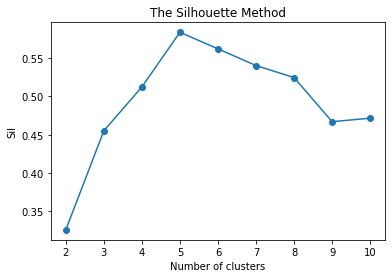

In [38]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range (2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

###### Note
- Silhouette method  indicates 5 clusters would be best
- Try out K-means ckustering model with 4-6 clusters to establish right balance to achieve useful insights.

## 4. Evaluate k-means model at different values of *k*

##### 4 Cluster evaluation

In [39]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

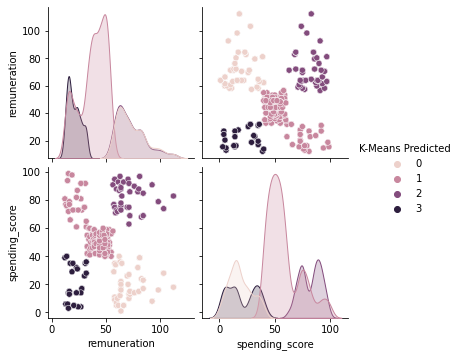

In [40]:
# Create a scatterplot.
# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

#####  5 Clusters evaluation

In [41]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

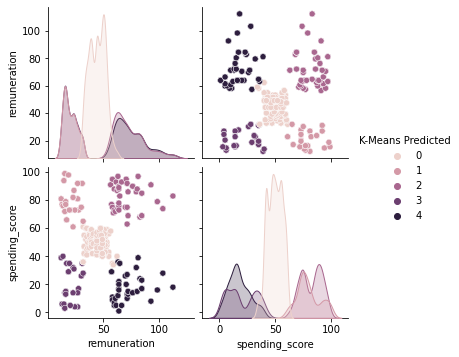

In [42]:
# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

#####  6 Cluster evaluation

In [43]:
# Use five clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

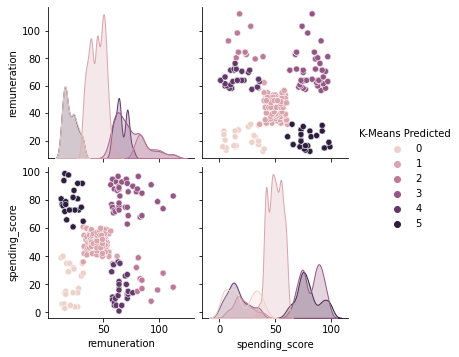

In [44]:
# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## 5. Fit final model and justify your choice

######  5 clusters gives the best fit and is supported by both the Elbow and Silhouette  methods.
- 4 clusters is too few
    - it is unclear why the group of data points to the top left has been included in the central cluster. It looks like a distinct cluser.
    - It looks as if parts pf cluster 0 or 3 could have been added just as easily. 
- 6 clusters is too many
    - The new cluster seems very dispersed 
    - it is more likley these represent outliers than a distinct cluster. 
    - Looking at the scatterplot by eye it seems no more logical so split cluster 4 into 2 separate clusters than cluster 2

In [45]:
# Apply the final model.
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

In [46]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

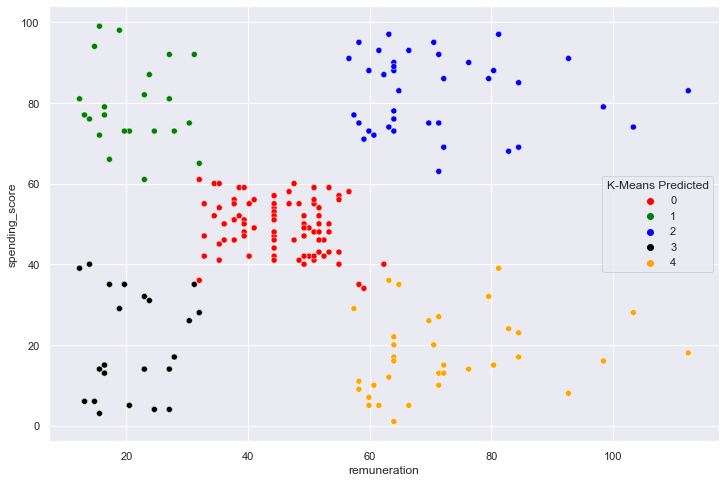

In [47]:
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot to visualise clusters.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

#####  Explore cluster zero

cluster 0 shows a high annual income but low spending, it would be worth exploring this cluster more to understand if there are any other variables that define this cluster and what might move them toward spending more.

In [48]:
# Create new data frame with cluster grouping
reviewsK = reviews
reviewsK['Cluster'] = kmeans.labels_

# View dataframe
reviewsK.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary,Cluster
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,3
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",3
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,1
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,3


In [49]:
# Check cluster count in new data frame is the the same as original cluster count from K-means test.
reviewsK['Cluster'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: Cluster, dtype: int64

In [50]:
# Create subset of data frame just for cluster 0
cluster_zero = reviewsK.loc[(reviewsK['Cluster'] == 0)]

# View summary of data frame.
cluster_zero.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary,Cluster
42,Male,46,31.98,36,849,diploma,2829,Very nice book. Just wished there was more pag...,Very Nice!,0
43,Female,33,31.98,61,1280,graduate,629,I love it!,Five Stars,0
46,Female,49,32.80,55,1338,graduate,3667,MY HUSBAND LOVED IT. HE IS IN TO DRAGONS.,Five Stars,0
47,Female,29,32.80,47,942,postgraduate,3678,The dragons are really interesting and fun to ...,Five Stars,0
48,Female,29,32.80,42,842,graduate,2079,love it,Five Stars,0


In [51]:
# Group dataframe by cluster and count members
cluster_zero_c = cluster_zero.groupby(['gender', 'education'])[['Cluster']].value_counts()
cluster_zero_c

gender  education     Cluster
Female  Basic         0            9
        PhD           0           64
        diploma       0           46
        graduate      0          205
        postgraduate  0          122
Male    Basic         0            2
        PhD           0          101
        diploma       0           30
        graduate      0          142
        postgraduate  0           53
dtype: int64

## 7. Discuss: Insights and observations

- The largest is cluster 4, so there are plenty of customers here that could be targetted to try and increase their spending
- cluster 2 shows customers with a high annual income and coresponding spend. It might be worth exploring what products they enjoy and targetting them with adverts for more of these products
- cluster 0 shows a high annual income but low spending, it would be worth exploring this cluster more to understand if there are any other variables that define this cluster and what might move them toward spending more.

# 

# Week 3 assignment: NLP using Python
- Customer reviews were downloaded from the website of Turtle Games. 
- This data will be used to steer the marketing department on how to approach future campaigns. 
- The marketing department want to  
    - identify the 15 most common words used in online product reviews.
    - have a list of the top 20 positive and negative reviews received from the website.
    
###### Apply NLP on the data set to meet marketing deparment requests.

## 1. Load and explore the data

```python
# Packages used in this section

import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter
```

In [52]:
# Load the data set as df3.
df3 = pd.read_csv('reviews_cleaned.csv')


# View the DataFrame.
print(df3.shape)
df3.head()

(2000, 9)


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [53]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [54]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3[['review', 'summary']]

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [55]:
# Determine if there are any missing values.
df3.isna().sum()

review     0
summary    0
dtype: int64

Note - No missing values in review or summary column

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

#####  Note - the following prep is necessary to utitilse wordclouds for NLP
- python is case sensitive so text must be converted to a single case
- punctuation needs to be removed and replaced with blank spaces.

In [56]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [57]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [58]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [59]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [60]:
# Check the number of duplicate values in the COMMENTS column.
d = df3.review.duplicated().sum()
print (f'There are {d} duplicates in the review column')

There are 50 duplicates in the review column


In [61]:
# Check the number of duplicate values in the COMMENTS column.
d2 = df3.summary.duplicated().sum()
print (f'There are {d2} duplicates in the summary column')

There are 649 duplicates in the summary column


##### Note 
 - differeing number of duplicates in each column suggests that these may not be true duplicates, but instead might be instances of different customers writing the same review.
 - check entire data frame for duplicates
 - check contents of duplicate entries

#####  Full data frame duplicate check

In [62]:
df4 = pd.read_csv('reviews_cleaned.csv')

In [63]:
# View duplicates in original dataframe, comparing whole row.
duplicate = df4[df4.duplicated()]
duplicate

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary


In [64]:
# Count duplicates in orginal dataframe, comparing whole row.
dc = df4.duplicated().sum()

#View output
print (f'There are {dc} duplicate rows in the original dataframe')

There are 0 duplicate rows in the original dataframe


##### Duplicate entries check

In [65]:
# View duplicate text from review column
duplicate = df3[df3.duplicated()]
duplicate['review'].unique()

array(['great', 'love it', 'good', 'great game', 'i love it', 'awesome',
       'nice', 'ontime and nice item', 'best game ever',
       'great expansion to a great game', 'great addition to the game',
       'cute', 'very cute', 'as expected', 'awesome game', 'love these',
       'good product', 'great family game', 'fun game', 'good game', 'ok'],
      dtype=object)

In [66]:
# View duplicate text from summary column
duplicate = df3[df3.duplicated()]
duplicate['summary'].unique()

array(['five stars'], dtype=object)

######  Note: 
- Original dataframe shows no duplicate entires, so although there are duplicates in review and summary column these are unlikley to be due to error  
- More likely that people filled in the same info. Especially when we consider the contents such as single words like "awesome" or phrases such as "fun game" or "5 stars"
- However given the marketing request, it is beter to remove these duplications to ensure the final output for top and bottom reviews provides a unique set of comments.

#####  Remove duplicates

In [67]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['summary'])
df3 = df3.drop_duplicates(subset=['review'])

In [68]:
# Check duplciates have been removed

d3 = df3.review.duplicated().sum()
print (f'There are {d3} duplicates in the review column of df3')
d4 = df3.summary.duplicated().sum()
print (f'There are {d4} duplicates in the summary column of df3')

# Reset index. 
df3.reset_index(inplace=True)

# View data frame
df3.head()

There are 0 duplicates in the review column of df3
There are 0 duplicates in the summary column of df3


,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

#####  Note
In order to create a word cloud the reviews need breaking down from sentences to idividual word 'tokens'.

In [69]:
# Create new DataFrame (copy DataFrame).
df5 = df3.copy()

# View DataFrame.
df5.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


#####  Tokenise review column

In [70]:
# Tokenise the text data in review columns
df5['review_tokens'] = df5['review'].apply(word_tokenize)

# Check the result.
df5['review_tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_tokens, dtype: object

#####  Tokenise summary column

In [71]:
# Tokenise the text data in summary columns
df5['summary_tokens'] = df5['summary'].apply(word_tokenize)

# Check the result.
df5['summary_tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary_tokens, dtype: object

In [72]:
# Check data frame
df5.head()

,index,review,summary,review_tokens,summary_tokens
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


##### Create Word cloud to visualise most frequently occuring words in both columns

#####  Review column

In [73]:
# String all the tokenised reviews together in a single variable.
all_reviews = []
for i in range(df5.shape[0]):
    # Add each tokenised review.
    all_reviews = all_reviews + df5['review_tokens'][i]

In [74]:
# Convert review tokens list to a string for word cloud
rToStr = ' '.join([str(elem) for elem in all_reviews])

In [75]:
# Review: Create a word cloud.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(rToStr) 

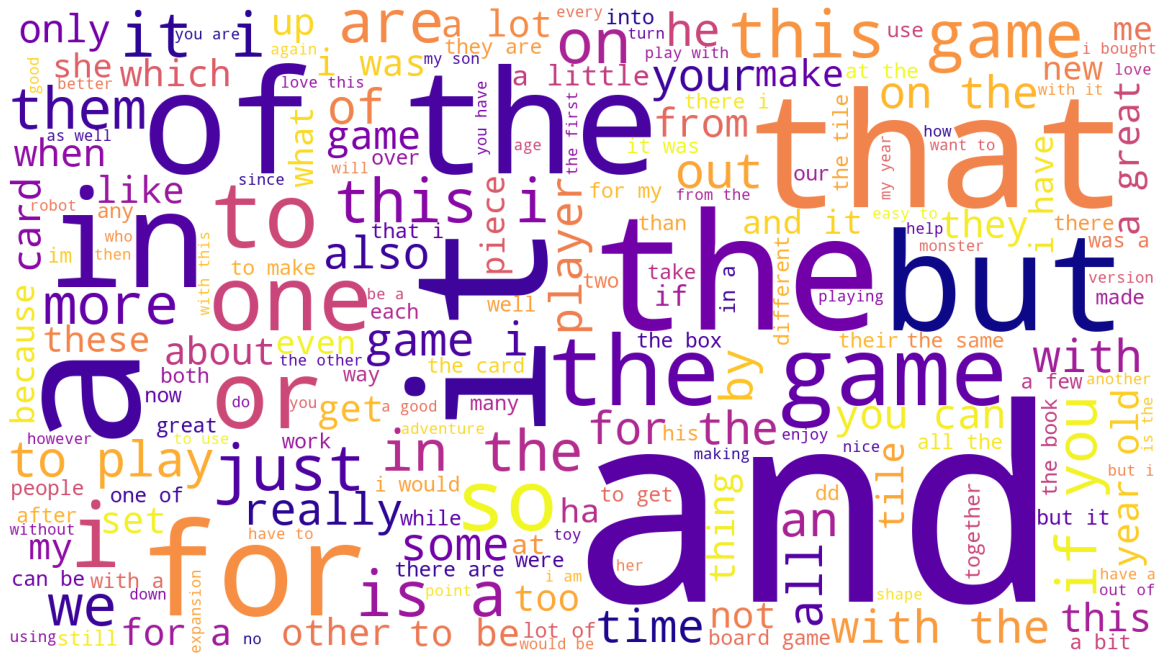

In [76]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

##### Summary column

In [77]:
# Summary: Create a word cloud.
# Apply tokenisation to both columns.
all_summaries = []
for i in range(df5.shape[0]):
    # Add each comment.
    all_summaries = all_summaries + df5['summary_tokens'][i]

In [78]:
# Convert summary tokens list to a string for word cloud
sToStr = ' '.join([str(elem) for elem in all_summaries])

In [79]:
# Create a WordCloud object.
word_cloud2 = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(sToStr) 

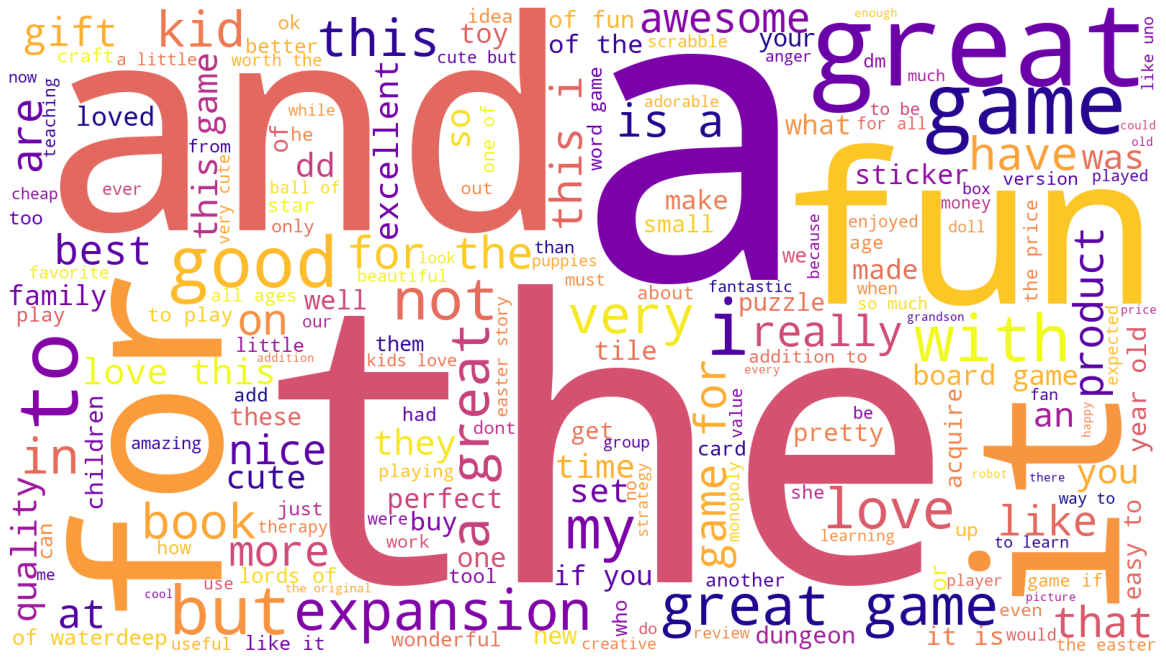

In [80]:
# Summary: Plot the WordCloud image.
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

##### Note
- Both word clouds seem to show mainly low value words like 'the' or 'and'
- Check word frequency and decide whether these words need to be removed 

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

######  Review column

In [81]:
# Calculate the frequency distribution.
fdist = FreqDist(all_reviews)

# Preview data.
fdist

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

In [82]:
# View full list of words in order of frequency
print(*fdist,sep='\n')

the
and
to
a
of
i
it
is
this
for
game
with
you
in
that
are
my
but
have
as
on
be
can
was
so
one
we
they
play
its
more
not
if
all
or
fun
great
like
very
just
at
out
them
get
up
cards
tiles
really
when
there
an
some
will
from
your
book
would
well
time
new
love
games
these
good
had
board
use
much
make
has
little
do
old
other
which
he
who
by
playing
than
set
what
only
kids
also
even
about
played
pieces
how
too
because
year
players
were
dont
expansion
dungeon
each
box
me
she
our
dd
into
two
lot
many
first
together
made
quality
way
could
bought
their
buy
enough
few
no
then
loves
any
im
over
most
easy
card
now
recommend
been
his
better
used
after
her
different
3
still
own
nice
ball
rules
both
people
bit
find
think
back
same
5
version
cute
2
while
those
story
want
tile
children
product
down
things
see
son
big
however
take
every
got
player
makes
need
anger
since
go
family
price
am
enjoy
pretty
work
keep
cant
gift
put
ive
daughter
small
yarn
should
again
did
using
4
loved
once
friends
come
long
l

contents
dissappointed
cuddly
taste
ons
carrier
slumber
apply
untouched
trust
artsy
nieces
shed
gently
decorations
styling
tuck
trim
border
collie
penny
quit
assortment
grandaughter
comb
couch
fluffy
poodle
dinner
nine
girlfriend
pair
11th
rated
rates
oldfashioned
crafter
comment
breed
listing
sew
tan
switch
projects
stress
flaws
measuring
choosing
yard
fiveyearold
ad
stable
snow
cried
difficulties
indicate
yeah
leftover
noses
marketed
cry
critters
arches
snapped
engineering
challenged
wouldve
understanding
neatly
michaels
anybody
badly
tries
clover
suspect
fluffing
manufacturer
5year
straightforward
ear
sleeping
ornaments
premade
focusing
impulses
angermanagement
counselor
awareness
jumps
trauma
stupid
612
topics
combines
loses
answers
encourage
access
themes
pop
therapeutic
cues
anxiety
lately
shell
asks
solve
regulation
oneonone
schools
defeat
whoever
7th
weekend
wordy
sharing
settings
assists
developing
patients
intern
suggested
successful
client
relate
provoking
identify
respond
r

promoted
splunked
hardearned
duly
dreams
doorstep
gamely
childlike
horrid
ooh
flaming
sphere
spells
whee
downhill
vision
effectively
munchkin
sensed
sadistic
progress
unexplored
invariably
minmax
twentysided
advances
standing
tedious
missile
promising
scroll
replaces
hypnotized
claws
standardized
scrubbed
misinterpreting
fourplayer
fearless
vanquishing
climb
malevolent
reverts
alarm
alerting
orcish
presence
cage
poisonous
gas
fills
zany
encountered
dread
misinterpreted
unrealistic
designate
administrate
soontobeavailable
delightful
imaginations
playednbspa
hrefdungeonsdragonscastleravenloftboardgamedp0786955570refcm_cr_arp_d_rvw_txtieutf8dungeons
gamea
regardless
65
laymans
entrance
destroy
altar
condense
swarm
tunnels
chambers
representation
overly
villan
mass
modeling
figurine
nicest
purchasers
villans
phases
itll
conveying
basics
nonexistant
355
orders
455
aka
symbol
megadungeon
delve
collectable
initial
considerable
boosters
tanks
infantry
artillery
specifies
falsethe
5piece
flgs
1

###### Summary column

In [83]:
# Calculate the frequency distribution.
fdist2 = FreqDist(all_summaries)

# Preview data.
fdist2

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

#####  Note
- The highest frequency words in the review column are stopwords like 'the' or 'and' these need to be removed to get to the useful words that provide meaning
- The summary column also shows a high frequency of words that add little value.
- Remove these words form the tokenised strings to reveal most used words that provide meaningful  expressions of sentiment

### 4b) Remove alphanumeric characters and stopwords

In [84]:
# Delete all the alpanum.
rtokens = [word for word in all_reviews if word.isalnum()]
stokens = [word for word in all_summaries if word.isalnum()]

In [85]:
# Check variable contents& format
rtokens[:10]

['when', 'it', 'comes', 'to', 'a', 'dms', 'screen', 'the', 'space', 'on']

In [86]:
# Check variable contents & format
stokens[:10]

['the', 'fact', 'that', '50', 'of', 'this', 'space', 'is', 'wasted', 'on']

In [87]:
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
e_stopwords = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###### Remove stop words from review column

In [88]:
# Create a filtered list of tokens without stop words.
rtokens2 = [x for x in rtokens if x.lower() not in e_stopwords]

# Define an empty string variable.
rtokens2_string = ''

for value in rtokens:
    # Add each filtered token word to the string.
    rtokens2_string = rtokens2_string + value + ' '

In [89]:
# Check filtered list contents
rtokens2[:10]

['comes',
 'dms',
 'screen',
 'space',
 'screen',
 'absolute',
 'premium',
 'fact',
 '50',
 'space']

##### Remove stop words from summary column

In [90]:
# Create a filtered list of tokens without stop words.
stokens2 = [x for x in stokens if x.lower() not in e_stopwords]

# Define an empty string variable.
stokens2_string = ''

for value in stokens:
    # Add each filtered token word to the string.
    stokens2_string = stokens2_string + value + ' '

In [91]:
stokens2[:10]

['fact',
 '50',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'another']

### 4c) Create wordcloud without stopwords

create custom list of words to remove words that don't add meaning:

######  Review column wordcloud

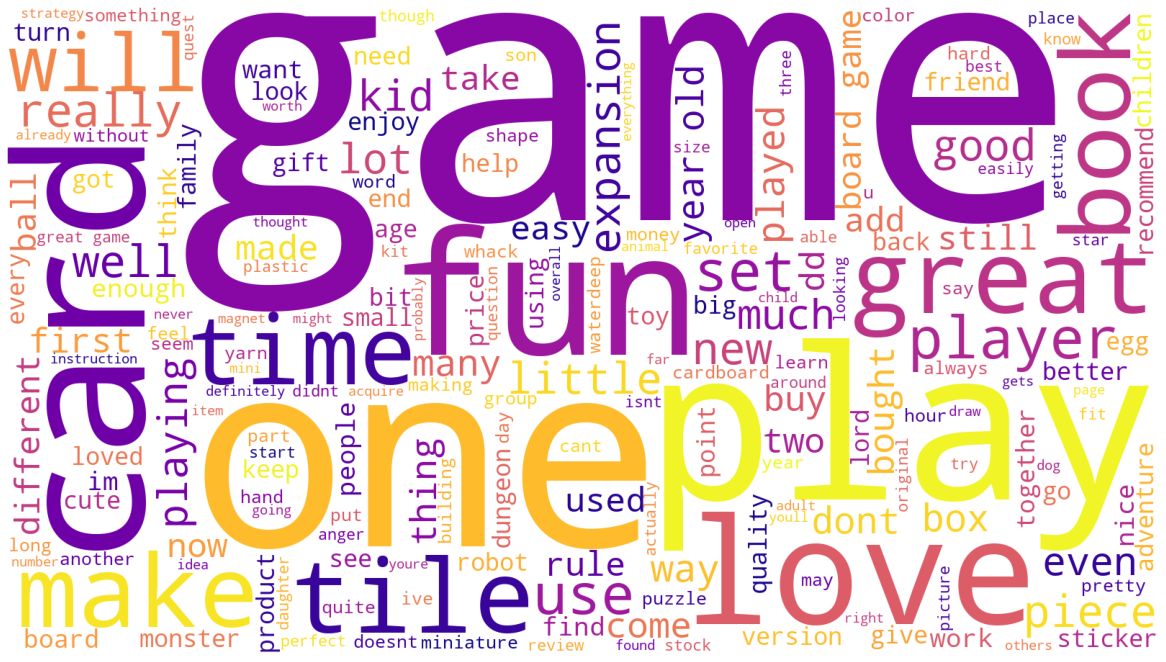

In [92]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(rtokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

######  Summary column wordcloud

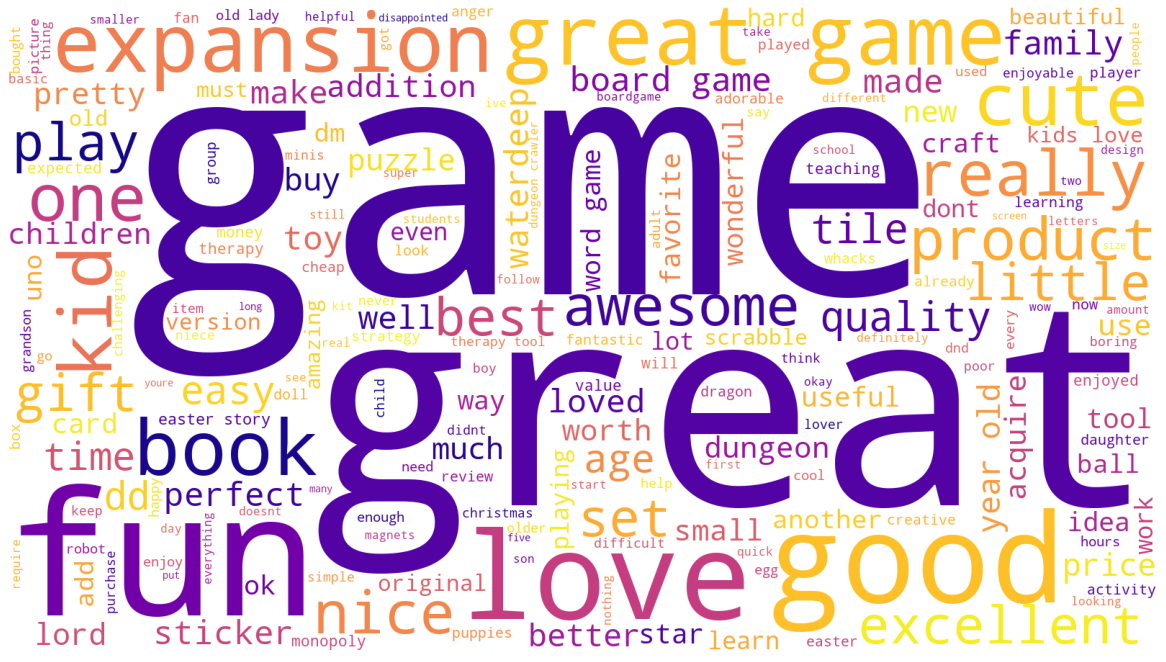

In [93]:
# Plot the wordcloud image.
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(stokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [94]:
# Determine the 15 most common words in review coloumn.
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
rcounts = pd.DataFrame(Counter(rtokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
rcounts

,Frequency
Word,
game,1359
one,475
play,442
fun,407
great,392
like,373
get,293
cards,281
tiles,280


######  visualise frequent words in review column

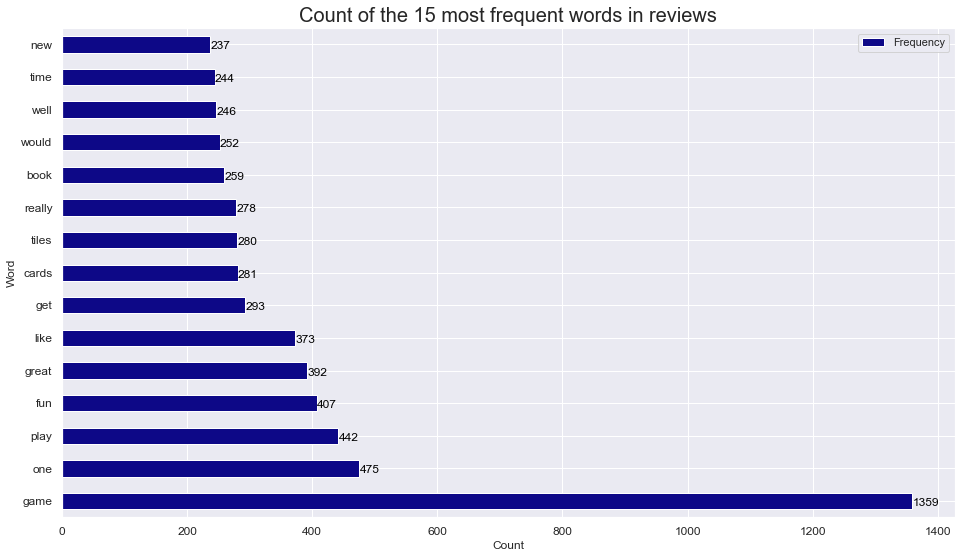

In [116]:
# Set the plot type.
ax = rcounts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Count of the 15 most frequent words in reviews",
             fontsize=20)

# Draw the bar labels.
# i as the iterator representing each bear in the chart. 
# .get_width()+.41, i.get_y() functions to set the bar sizes.
# add lables using str. round function to apply rounded value to each bar, in font size red.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='black')

In [95]:
# Determine the 15 most common words in summary column.

# Generate a DataFrame from Counter.
scounts = pd.DataFrame(Counter(stokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
scounts

,Frequency
Word,
game,268
great,237
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


######  visualise frequent words in summary column

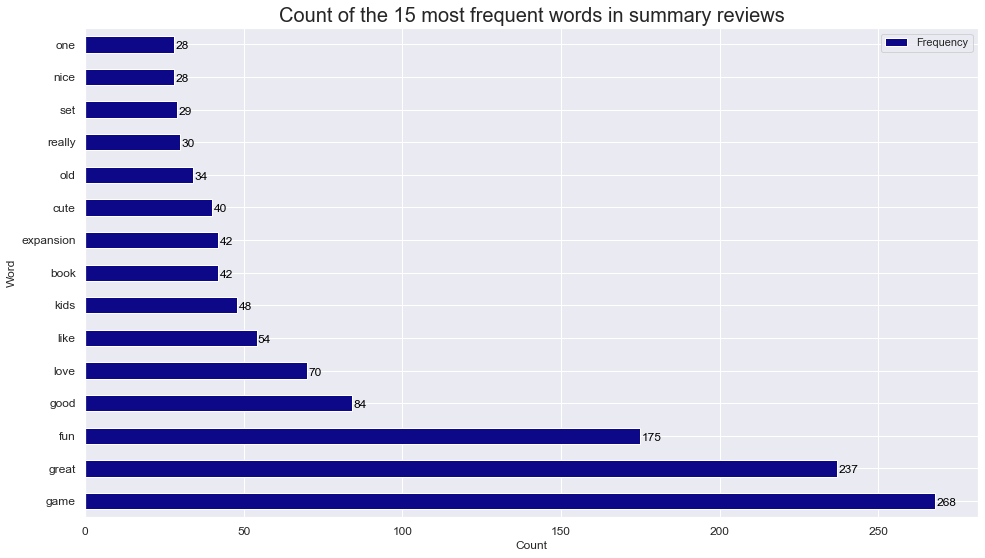

In [118]:
# Set the plot type.
ax = scounts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Count of the 15 most frequent words in summary reviews",
             fontsize=20)

# Draw the bar labels.
# i as the iterator representing each bear in the chart. 
# .get_width()+.41, i.get_y() functions to set the bar sizes.
# add lables using str. round function to apply rounded value to each bar, in font size red.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='black')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [96]:
# Import the necessary package.
from textblob import TextBlob

######  Polarity scores

In [97]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [98]:
# Determine polarity of both columns. 
reviews['polarity_r'] = reviews['review'].apply(generate_polarity)
reviews['polarity_s'] = reviews['summary'].apply(generate_polarity)

###### Reviews

In [99]:
# Preview the result.
reviews['polarity_r'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.628788
4   -0.316667
Name: polarity_r, dtype: float64

######  Summary

In [100]:
# Preview the result.
reviews['polarity_s'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_s, dtype: float64

#####  Review sentiment

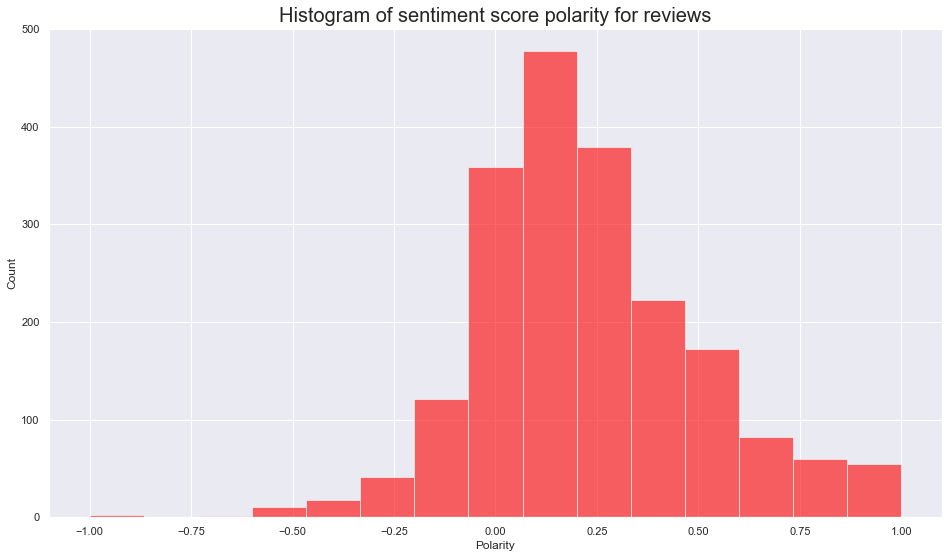

In [101]:
# Histogram of sentiment score with polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews['polarity_r'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for reviews', fontsize=20)

plt.show()

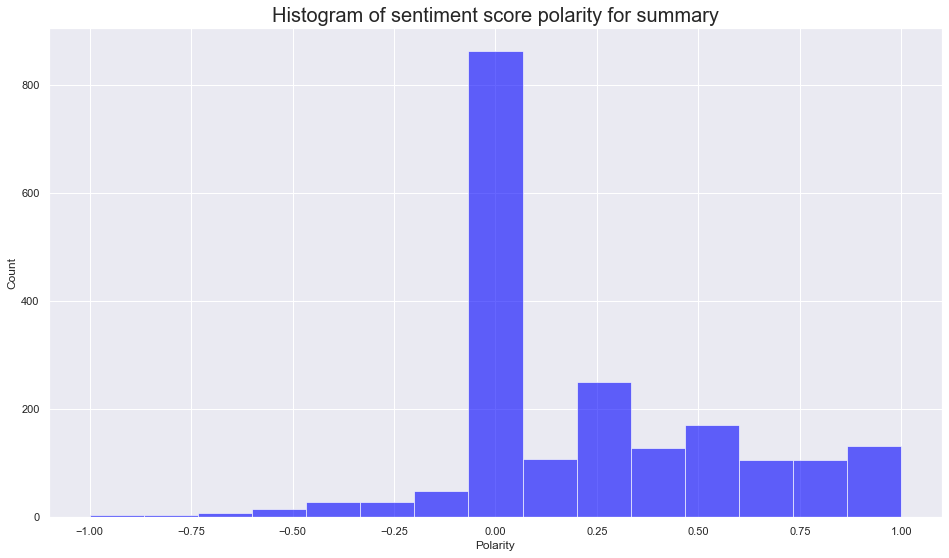

In [102]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews['polarity_s'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for summary', fontsize=20)

plt.show()

# Histogram of sentiment score


######  Subjectivity scores

In [103]:
# Provided function.
def generate_subjectivity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[1]

In [104]:
# Determine polarity of both columns. 
reviews['subjectivity_r'] = reviews['review'].apply(generate_subjectivity)
reviews['subjectivity_s'] = reviews['summary'].apply(generate_subjectivity)

######  Reviews Subjectivity

In [105]:
# Preview the result.
reviews['subjectivity_r'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity_r, dtype: float64

######  Summary Subjectivity

In [106]:
# Preview the result.
reviews['subjectivity_s'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity_s, dtype: float64

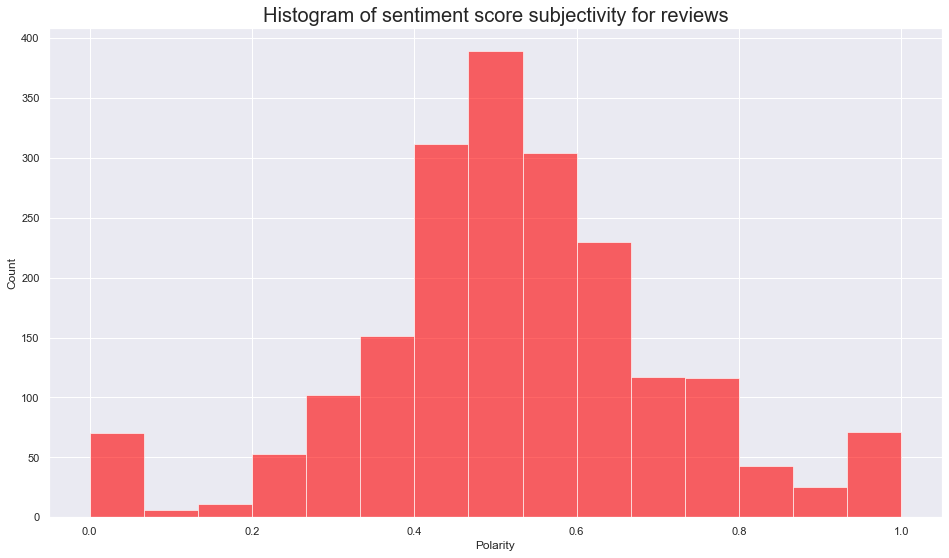

In [107]:
# Histogram of sentiment score
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews['subjectivity_r'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity for reviews', fontsize=20)

plt.show()

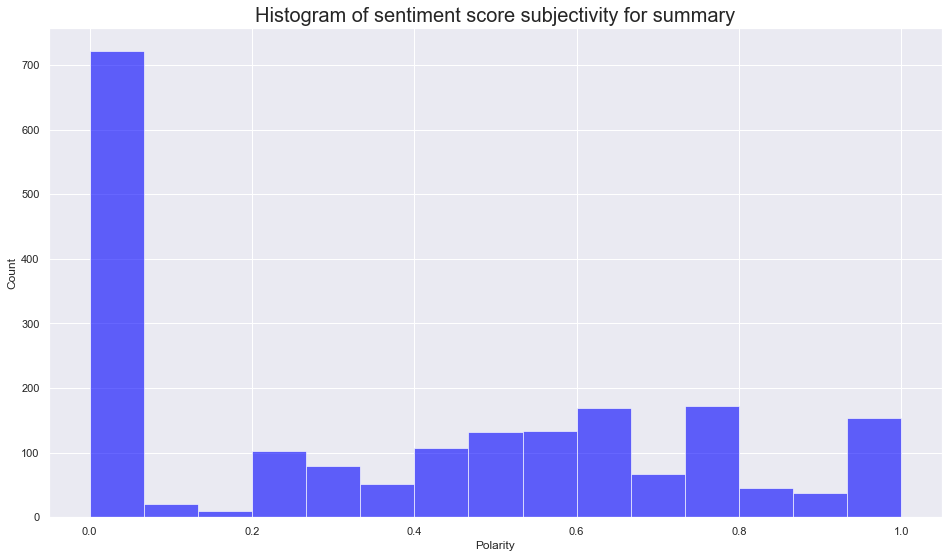

In [108]:
# Histogram of sentiment score
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews['subjectivity_s'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity for summary', fontsize=20)

plt.show()

### Compare sentiment scores

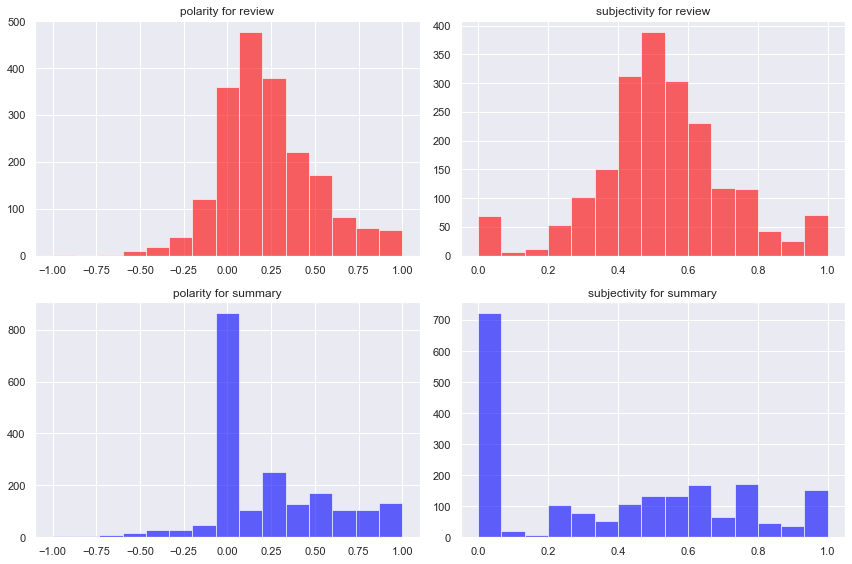

<Figure size 1152x648 with 0 Axes>

In [109]:
# Plot histograms on same plot to make comparison easier.
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

# Set the plot area.
plt.figure(figsize=(16,9))

ax0.hist(reviews['polarity_r'], num_bins, facecolor='red', alpha=0.6)
ax0.set_title('polarity for review')

ax1.hist(reviews['subjectivity_r'], num_bins, facecolor='red', alpha=0.6)
ax1.set_title('subjectivity for review')

ax2.hist(reviews['polarity_s'], num_bins, facecolor='blue', alpha=0.6)
ax2.set_title('polarity for summary')

ax3.hist(reviews['subjectivity_s'], num_bins, facecolor='blue', alpha=0.6)
ax3.set_title('subjectivity for summary')


fig.tight_layout()
plt.show()

**Note** 
Polarity score = scale of 0 (negative) to 1 (positive)
Subjectivity score = scale of 0 (objective) to 1 (oppinion)

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [110]:
#Show available columns in review dataframe.
reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary', 'Cluster', 'polarity_r',
       'polarity_s', 'subjectivity_r', 'subjectivity_s'],
      dtype='object')

###### Negative

In [111]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment_r = reviews.nsmallest(20, 'polarity_r')

# Eliminate unnecessary columns.
negative_sentiment_r = negative_sentiment_r[['review',
                                         'Cluster', 
                                         'spending_score', 
                                         'remuneration', 
                                         'polarity_r', 
                                         'subjectivity_r']]

# Adjust the column width to improve readability.
negative_sentiment_r.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,Cluster,spending_score,remuneration,polarity_r,subjectivity_r
208,BOOO UNLES YOU ARE PATIENT KNOW HOW TO MEASURE I DIDN'T HAVE THE PATIENCE NEITHER DID MY DAUGHTER. BORING UNLESS YOU ARE A CRAFT PERSON WHICH I AM NOT.,3,3,15.580000,-1.000000,1.000000
182,Incomplete kit! Very disappointing!,4,15,80.360000,-0.975000,0.910000
989,"If you, like me, used to play D&D, but now you and your friends ""growed up"" and can't be together because all the responsibilities and bla bla bla... this game is for you! Come to the Dungeon!",2,85,84.460000,-0.625000,0.400000
1804,"I'm sorry. I just find this product to be boring and, to be frank, juvenile.",1,77,13.120000,-0.583333,0.750000
364,"One of my staff will be using this game soon, so I don't know how well it works as yet, but after looking at the cards, I believe it will be helpful in getting a conversation started regarding anger and what to do to control it.",4,26,69.700000,-0.550000,0.300000
117,I bought this as a Christmas gift for my grandson. Its a sticker book. So how can I go wrong with this gift.,0,59,53.300000,-0.500000,0.900000
227,this was a gift for my daughter. I found it difficult to use,1,61,22.960000,-0.500000,1.000000
230,I found the directions difficult,3,4,24.600000,-0.500000,1.000000
290,Instructions are complicated to follow,0,55,48.380000,-0.500000,1.000000
301,Difficult,0,48,50.840000,-0.500000,1.000000


In [112]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment_s = reviews.nsmallest(20, 'polarity_s')

# Eliminate unnecessary columns.
negative_sentiment_s = negative_sentiment_s[['summary',
                                         'Cluster', 
                                         'spending_score', 
                                         'remuneration', 
                                         'polarity_s', 
                                         'subjectivity_s']]

# Adjust the column width to improve readability.
negative_sentiment_s.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,Cluster,spending_score,remuneration,polarity_s,subjectivity_s
21,The worst value I've ever seen,1,73,19.680000,-1.000000,1.000000
208,BORING UNLESS YOU ARE A CRAFT PERSON WHICH I AM ...,3,3,15.580000,-1.000000,1.000000
829,Boring,1,87,23.780000,-1.000000,1.000000
1166,before this I hated running any RPG campaign dealing with towns because it ...,4,20,70.520000,-0.900000,0.700000
1,Another worthless Dungeon Master's screen from GaleForce9,1,81,12.300000,-0.800000,0.900000
144,Disappointed,4,12,63.140000,-0.750000,0.750000
631,Disappointed.,1,73,24.600000,-0.750000,0.750000
793,Disappointed,2,91,92.660000,-0.750000,0.750000
1620,Disappointed,0,59,39.360000,-0.750000,0.750000
363,Promotes anger instead of teaching calming methods,2,93,66.420000,-0.700000,0.200000


##### Looking at the comments in context you can see that the sentiment review has listed some neutral and some positive comments as negative such as 
-  "My son loves playing this game. It was recommended by a counselor at school that works with him." Sounds quite positive, but given -0.4 rating
-  most of the negative comments seem to be about poor instructions or missing parts. Would be good to look at this further and see if it was linked to specific types or individual products.
    - aspect based sentiment analysis might create a clearer view by classifying the aspect / element of the game that a customer liked or disliked.

######  Positive

In [113]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_sentiment_r = reviews.nlargest(20, 'polarity_r')

# Eliminate unnecessary columns.
positive_sentiment_r = positive_sentiment_r[['review',
                                         'Cluster', 
                                         'spending_score', 
                                         'remuneration', 
                                         'polarity_r', 
                                         'subjectivity_r']]

# Adjust the column width to improve readability.
positive_sentiment_r.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,Cluster,spending_score,remuneration,polarity_r,subjectivity_r
7,Came in perfect condition.,1,94,14.760000,1.000000,1.000000
44,Absolutely great pictures even before coloring!,3,28,31.980000,1.000000,0.750000
55,Great!,0,41,35.260000,1.000000,0.750000
165,Awesome book,2,75,69.700000,1.000000,1.000000
194,Awesome gift,4,16,98.400000,1.000000,1.000000
216,Great product! Arrived on time.,3,35,17.220000,1.000000,0.750000
318,Great buy!! My granddaughter loves it!!,0,43,54.940000,1.000000,0.750000
371,Great!,2,75,71.340000,1.000000,0.750000
418,Great resource for BHIS care coordinators!! Works well with kids and teens on what it says it does!!,3,29,18.860000,1.000000,0.750000
474,Great Seller!!! Happy with my purchase!!! 5 starrrr,0,47,44.280000,1.000000,0.875000


In [114]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_sentiment_s = reviews.nlargest(20, 'polarity_s')

# Eliminate unnecessary columns.
positive_sentiment_s = positive_sentiment_s[['summary',
                                         'Cluster', 
                                         'spending_score', 
                                         'remuneration', 
                                         'polarity_s', 
                                         'subjectivity_s']]

# Adjust the column width to improve readability.
positive_sentiment_s.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,Cluster,spending_score,remuneration,polarity_s,subjectivity_s
6,Best gm screen ever,3,6,14.760000,1.000000,0.300000
28,Wonderful designs.,3,31,23.780000,1.000000,1.000000
32,Perfect!,3,4,27.060000,1.000000,1.000000
37,Great buy! Can't wait to work on this book,1,73,27.880000,1.000000,0.750000
40,So beautiful!,3,35,31.160000,1.000000,1.000000
57,great!,0,46,36.080000,1.000000,0.750000
80,They're the perfect size to keep in the car or a diaper ...,0,51,44.280000,1.000000,1.000000
122,Great for a gift!,0,58,56.580000,1.000000,0.750000
134,Perfect for Preschooler,4,5,59.860000,1.000000,1.000000
140,Awesome sticker activity for the price,4,5,61.500000,1.000000,1.000000


#####  interesting to note that people write more when they have a negative comment. Not much more info in the review and summary for the  positive comments

## 7. Discuss: Insights and observations

**Note** insights and observations are included above

# 